<a href="https://colab.research.google.com/github/KarthiK-ctrl-A/BigDataAnalytics/blob/main/SaiKarthikPatri_CNN_Modeling%26Explainability_with_Gemini_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False,
download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 54.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.91MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.3MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.83MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1,padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1,padding=1)
    self.fc1 = nn.Linear(64 * 7 * 7, 128)
    self.fc2 = nn.Linear(128, 10)
  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = x.view(-1, 64 * 7 * 7)
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x
model = CNN()

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(3):
  running_loss = 0.0
  for images, labels in trainloader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")


Epoch 1, Loss: 0.16138699475545754
Epoch 2, Loss: 0.04668637121437308
Epoch 3, Loss: 0.032094951842318045


In [5]:
correct = 0
total = 0
with torch.no_grad():
  for images, labels in testloader:
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 98.55%


# CNN Prediction & Explainability with Gemini API

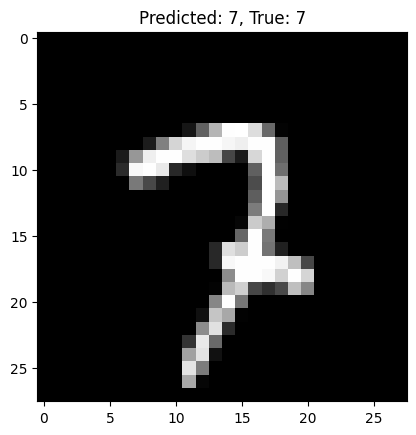

In [6]:
import random
import matplotlib.pyplot as plt
dataiter = iter(testloader)
images, labels = next(dataiter)
index = random.randint(0, len(images) - 1)
img = images[index].squeeze()
true_label = labels[index].item()
output = model(images[index].unsqueeze(0))
predicted_label = torch.argmax(output).item()
plt.imshow(img.numpy(), cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.show()

In [20]:
GEMINI_API_KEY = GEMINI_API_KEY
GEMINI_ENDPOINT = "https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent"
headers = {
"Content-Type": "application/json"
}
prompt = f"The CNN model predicted digit {predicted_label} for an image. Explain why it might have made this prediction."
data = {
    "contents": [
        {
            "parts": [
                {"text": prompt}
            ]
        }
    ]
}

# Send the POST request
response = requests.post(
    f"{GEMINI_ENDPOINT}?key={GEMINI_API_KEY}",
    headers=headers,
    json=data
)

# Handling the response
# print(response.text)
if response.status_code == 200:
  response_json = response.json()
  explanation = response_json["candidates"][0]["content"]["parts"][0]["text"]
  print("Gemini Explanation:", explanation)
else:
    print(f"Error {response.status_code}: {response.text}")

Gemini Explanation: A CNN (Convolutional Neural Network) might predict the digit 7 for an image due to several reasons, all boiling down to the features it learned during training and how those features match the input image:

* **Presence of characteristic features:** The CNN likely learned during training that the digit 7 is characterized by a long vertical stroke and a short horizontal stroke at the top. If the input image contains these features prominently, even with variations in thickness, slant, or size, the CNN might classify it as a 7.

* **Weight assignments:** The internal weights and biases of the CNN's neurons determine how strongly different features contribute to the final classification.  If the weights associated with the vertical and horizontal stroke features are high, and the input image activates these neurons strongly, the output layer will likely favor the 7 class.

* **Activation maps and feature maps:**  The CNN's convolutional layers create feature maps that 

In [11]:
# Define transform with normalization for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)




Files already downloaded and verified
Files already downloaded and verified


In [12]:
# Define CIFAR-10 class names
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# CNN Model Definition for CIFAR-10
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Input has 3 channels (RGB) instead of 1 channel (grayscale)
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 64)  # CIFAR-10 images are 32x32, after two poolings the size is 8x8
        self.fc2 = nn.Linear(64, 10)  # 10 output classes for CIFAR-10

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [13]:
# Initialize the model, criterion, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(2):  # Train for 2 epochs
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader):.4f}")

# Testing Loop
correct = 0
total = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Calculate accuracy for each class
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# Overall test accuracy
print(f"Overall Test Accuracy: {100 * correct / total:.2f}%")

# Accuracy for each class
for i in range(10):
    print(f'Accuracy of {classes[i]} : {100 * class_correct[i] / class_total[i]:.2f}%')


Epoch 1, Loss: 1.3479
Epoch 2, Loss: 0.9796
Overall Test Accuracy: 65.52%
Accuracy of plane : 78.80%
Accuracy of car : 85.90%
Accuracy of bird : 68.80%
Accuracy of cat : 38.90%
Accuracy of deer : 54.70%
Accuracy of dog : 53.40%
Accuracy of frog : 74.50%
Accuracy of horse : 74.00%
Accuracy of ship : 79.00%
Accuracy of truck : 47.20%


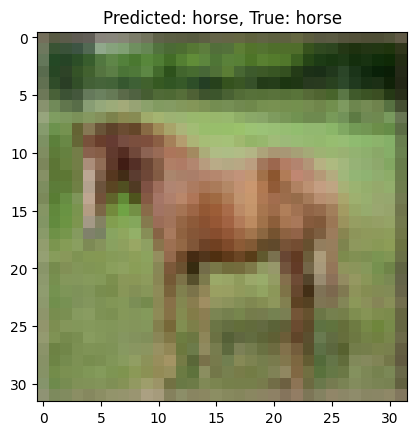

In [18]:

# Ensure the model is in evaluation mode
model.eval()

# Get a batch of images and labels from the test loader
dataiter = iter(testloader)
images, labels = next(dataiter)

# Randomly pick an image from the batch
index = random.randint(0, len(images) - 1)
img = images[index].permute(1, 2, 0)  # Rearrange tensor dimensions from (C, H, W) to (H, W, C) for display
true_label = labels[index].item()

# Move image to device (if using GPU)
img_input = images[index].unsqueeze(0).to(device)  # Add a batch dimension to the image

# Get the prediction for the chosen image
output = model(img_input)
predicted_label = torch.argmax(output, dim=1).item()

# Unnormalize the image for display
img = img * 0.5 + 0.5  # CIFAR-10 normalization was done with mean=0.5, std=0.5, so reverse it here

# Display the image with predicted and true labels
plt.imshow(img.cpu().numpy())  # Move image back to CPU if necessary
plt.title(f"Predicted: {classes[predicted_label]}, True: {classes[true_label]}")
plt.show()


In [21]:
GEMINI_API_KEY = GEMINI_API_KEY
GEMINI_ENDPOINT = "https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent"
headers = {
"Content-Type": "application/json"
}
prompt = f"The CNN model predicted class {predicted_label} for an image and actual class {true_label}. Explain why it might have made this prediction."
data = {
    "contents": [
        {
            "parts": [
                {"text": prompt}
            ]
        }
    ]
}

# Send the POST request
response = requests.post(
    f"{GEMINI_ENDPOINT}?key={GEMINI_API_KEY}",
    headers=headers,
    json=data
)

# Handling the response
# print(response.text)
if response.status_code == 200:
  response_json = response.json()
  explanation = response_json["candidates"][0]["content"]["parts"][0]["text"]
  print("Gemini Explanation:", explanation)
else:
    print(f"Error {response.status_code}: {response.text}")

Gemini Explanation: A CNN correctly predicting class 7 for an image that actually belongs to class 7 can be attributed to several factors, all pointing towards a successful learning and inference process:

* **Relevant Features Learned:** The CNN successfully learned and identified the key visual features characteristic of class 7 during training.  These features could be specific shapes, textures, colors, or spatial arrangements unique to that class. The image presented during inference contained these features prominently, allowing the network to accurately classify it.

* **Sufficient Training Data:**  The model was likely trained on a dataset with a sufficient number of examples belonging to class 7, and these examples were diverse enough to capture the variability within that class.  A larger and more diverse dataset allows the model to generalize better to unseen images.

* **Appropriate Network Architecture:** The architecture of the CNN (number of layers, filter sizes, activati